In [1]:
# -*- coding: UTF-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import math
from pandas import *
from cvxopt import matrix,solvers
from numpy.linalg import inv

In [2]:
Rewardfunction1 =np.zeros((10,10))
Rewardfunction1[9,9]=1
Rewardfunction1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

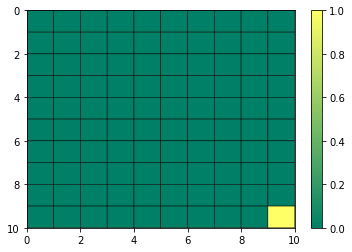

In [3]:
plt.pcolor(Rewardfunction1,cmap='summer',edgecolors='k',linewidths=0.5)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

In [65]:
Rewardfunction2 =np.zeros((10,10))
Rewardfunction2[1,4:7]=-100
Rewardfunction2[2:7,4]=-100
Rewardfunction2[1:4,6]=-100
Rewardfunction2[3,7:9]=-100
Rewardfunction2[4:8,8]=-100
Rewardfunction2[7,6:8]=-100
Rewardfunction2[8,6]=-100
Rewardfunction2[9,9]=10

In [66]:
Rewardfunction2

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0., -100., -100., -100.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0., -100.,    0., -100.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0., -100.,    0., -100., -100., -100.,
           0.],
       [   0.,    0.,    0.,    0., -100.,    0.,    0.,    0., -100.,
           0.],
       [   0.,    0.,    0.,    0., -100.,    0.,    0.,    0., -100.,
           0.],
       [   0.,    0.,    0.,    0., -100.,    0.,    0.,    0., -100.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0., -100., -100., -100.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0., -100.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          10.]])

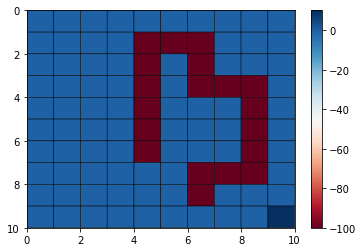

In [67]:
plt.pcolor(Rewardfunction2,cmap='RdBu',edgecolors='k',linewidths=0.5)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

# Optimal policy learning using RL algorithms

# Q2 Create the environment of the agent 

In [4]:
# create state space
S=np.arange(100).reshape((10,10),order='F')
print(S)

[[ 0 10 20 30 40 50 60 70 80 90]
 [ 1 11 21 31 41 51 61 71 81 91]
 [ 2 12 22 32 42 52 62 72 82 92]
 [ 3 13 23 33 43 53 63 73 83 93]
 [ 4 14 24 34 44 54 64 74 84 94]
 [ 5 15 25 35 45 55 65 75 85 95]
 [ 6 16 26 36 46 56 66 76 86 96]
 [ 7 17 27 37 47 57 67 77 87 97]
 [ 8 18 28 38 48 58 68 78 88 98]
 [ 9 19 29 39 49 59 69 79 89 99]]


In [5]:
#create Action set(A)
A=['R','L','U','D']

In [6]:
# create transition probabilities matrix
#for each action, given current state and next state
w=0.1

In [22]:
def transition_P(S_current,S_next,Action):
    if Action=='R':
        if S_current+10<100 and S_current-10>=0 and S_current%10!=9 and S_current%10!=0:
            if S_next==S_current+10:
                return 1-w+w/4
            elif S_next==S_current-1 or S_next==S_current+1 or S_next==S_current-10:
                return w/4
            else: 
                return 0
        elif S_current in (0,9,90,99):
            if S_current ==0:
                if S_next==S_current+10:
                    return 1-w+w/4
                elif S_next==1:
                    return w/4
                elif S_next==0:
                    return 2*w/4
                else:
                    return 0
            
            elif S_current==9:
                if S_next==S_current+10:
                    return 1-w+w/4
                elif S_next==8:
                    return w/4
                elif S_next==9:
                    return 2*w/4
                else:
                    return 0  
                
            elif S_current==90:
                if S_next==S_current-10:
                    return w/4
                elif S_next==91:
                    return w/4
                elif S_next==90:
                    return 1-w+2*w/4
                else:
                    return 0
                                
            elif S_current==99:
                if S_next==S_current-10:
                    return w/4
                elif S_next==98:
                    return w/4
                elif S_next==99:
                    return 1-w+2*w/4
                else:
                    return 0
        else:
            if S_current%10==0: # S_current in (10,20,30,40,50,60,70,80)
                if S_next==S_current+10:
                    return 1-w+w/4
                elif  S_next==S_current-10 or S_next==S_current+1 or S_next==S_current:
                    return w/4
                else:
                    return 0
                
            elif S_current%10==9:  # S_current in (19,29,39,49,59,69,79,89)
                if S_next==S_current+10:
                    return 1-w+w/4
                elif  S_next==S_current-10 or S_next==S_current-1 or S_next==S_current:
                    return w/4
                else:
                    return 0
                
            elif S_current-10<0:  # S_current in (1,2,3,4,5,6,7,8)
                if S_next==S_current+10:
                    return 1-w+w/4
                elif  S_next==S_current-1 or S_next==S_current+1 or S_next==S_current:
                    return w/4
                else:
                    return 0  
                
            else:  # S_current in (91,92,93,94,95,96,97,98)
                if S_next==S_current-10 or S_next==S_current-1 or S_next==S_current+1:
                    return w/4
                elif S_next==S_current:
                    return 1-w+w/4
                else:
                    return 0      
        
    elif Action=='L':
        
        if S_current+10<100 and S_current-10>=0 and S_current%10!=9 and S_current%10!=0:
            if S_next==S_current-10:
                return 1-w+w/4
            elif S_next==S_current-1 or S_next==S_current+1 or S_next==S_current+10:
                return w/4
            else: 
                return 0
        elif S_current in (0,9,90,99):
            if S_current ==0:
                if S_next==S_current+10:
                    return w/4
                elif S_next==1:
                    return w/4
                elif S_next==0:
                    return 1-w+2*w/4
                else:
                    return 0
            
            elif S_current==9:
                if S_next==S_current+10:
                    return w/4
                elif S_next==8:
                    return w/4
                elif S_next==9:
                    return 1-w+2*w/4
                else:
                    return 0          
            elif S_current==90:
                if S_next==S_current-10:
                    return 1-w+w/4
                elif S_next==91:
                    return w/4
                elif S_next==90:
                    return 2*w/4
                else:
                    return 0
                                
            elif S_current==99:
                if S_next==S_current-10:
                    return 1-w+w/4
                elif S_next==98:
                    return w/4
                elif S_next==99:
                    return 2*w/4
                else:
                    return 0
        else:
            if S_current%10==0: # S_current in (10,20,30,40,50,60,70,80)
                if S_next==S_current-10:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current+1 or S_next==S_current:
                    return w/4
                else:
                    return 0
                
            elif S_current%10==9:  # S_current in (19,29,39,49,59,69,79,89)
                if S_next==S_current-10:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current-1 or S_next==S_current:
                    return w/4
                else:
                    return 0
                
            elif S_current-10<0:  # S_current in (1,2,3,4,5,6,7,8)
                if S_next==S_current+10:
                    return w/4
                elif  S_next==S_current-1 or S_next==S_current+1:
                    return w/4
                elif S_next==S_current:
                    return 1-w+w/4
                else:
                    return 0  
                
            else:  # S_current in (91,92,93,94,95,96,97,98)
                if S_next==S_current-10:
                    return 1-w+w/4
                elif  S_next==S_current-1 or S_next==S_current+1:
                    return w/4
                elif S_next==S_current:
                    return w/4
                else:
                    return 0      
        
        
    elif Action=='U':
        if S_current+10<100 and S_current-10>=0 and S_current%10!=9 and S_current%10!=0:
            if S_next==S_current-1:
                return 1-w+w/4
            elif S_next==S_current+1 or S_next==S_current+10 or S_next==S_current-10:
                return w/4
            else: 
                return 0
        elif S_current in (0,9,90,99):
            if S_current ==0:
                if S_next==S_current+10:
                    return w/4
                elif S_next==1:
                    return w/4
                elif S_next==0:
                    return 1-w+2*w/4
                else:
                    return 0
            
            elif S_current==9:
                if S_next==S_current+10:
                    return w/4
                elif S_next==8:
                    return 1-w+w/4
                elif S_next==9:
                    return 2*w/4
                else:
                    return 0          
            elif S_current==90:
                if S_next==S_current-10:
                    return w/4
                elif S_next==91:
                    return w/4
                elif S_next==90:
                    return 1-w+2*w/4
                else:
                    return 0
                                
            elif S_current==99:
                if S_next==S_current-10:
                    return w/4
                elif S_next==98:
                    return 1-w+w/4
                elif S_next==99:
                    return 2*w/4
                else:
                    return 0
        else:
            if S_current%10==0: # S_current in (10,20,30,40,50,60,70,80)
                if S_next==S_current:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current+1 or S_next==S_current-10:
                    return w/4
                else:
                    return 0
                
            elif S_current%10==9:  # S_current in (19,29,39,49,59,69,79,89)
                if S_next==S_current-1:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current-10 or S_next==S_current:
                    return w/4
                else:
                    return 0
                
            elif S_current-10<0:  # S_current in (1,2,3,4,5,6,7,8)
                if S_next==S_current-1:
                    return 1-w+w/4
                elif  S_next==S_current or S_next==S_current+1 or S_next==S_current+10:
                    return w/4
                else:
                    return 0  
                
            else:  # S_current in (91,92,93,94,95,96,97,98)
                if S_next==S_current-1:
                    return 1-w+w/4
                elif  S_next==S_current-10 or S_next==S_current+1 or S_next==S_current:
                    return w/4

                else:
                    return 0    
        
    elif Action=='D':
        if S_current+10<100 and S_current-10>=0 and S_current%10!=9 and S_current%10!=0:
            if S_next==S_current+1:
                return 1-w+w/4
            elif S_next==S_current-1 or S_next==S_current+10 or S_next==S_current-10:
                return w/4
            else: 
                return 0
        elif S_current in (0,9,90,99):
            if S_current ==0:
                if S_next==S_current+10:
                    return w/4
                elif S_next==1:
                    return 1-w+w/4
                elif S_next==0:
                    return 2*w/4
                else:
                    return 0
            
            elif S_current==9:
                if S_next==S_current+10:
                    return w/4
                elif S_next==8:
                    return w/4
                elif S_next==9:
                    return 1-w+2*w/4
                else:
                    return 0          
            elif S_current==90:
                if S_next==S_current-10:
                    return w/4
                elif S_next==91:
                    return 1-w+w/4
                elif S_next==90:
                    return 2*w/4
                else:
                    return 0
                                
            elif S_current==99:
                if S_next==S_current-10:
                    return w/4
                elif S_next==98:
                    return w/4
                elif S_next==99:
                    return 1-w+2*w/4
                else:
                    return 0
        else:
            if S_current%10==0: # S_current in (10,20,30,40,50,60,70,80)
                if S_next==S_current+1:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current or S_next==S_current-10:
                    return w/4
                else:
                    return 0
                
            elif S_current%10==9:  # S_current in (19,29,39,49,59,69,79,89)
                if S_next==S_current:
                    return 1-w+w/4
                elif  S_next==S_current+10 or S_next==S_current-10 or S_next==S_current-1:
                    return w/4
                else:
                    return 0
                
            elif S_current-10<0:  # S_current in (1,2,3,4,5,6,7,8)
                if S_next==S_current+1:
                    return 1-w+w/4
                elif  S_next==S_current or S_next==S_current-1 or S_next==S_current+10:
                    return w/4
                else:
                    return 0  
                
            else:  # S_current in (91,92,93,94,95,96,97,98)
                if S_next==S_current+1:
                    return 1-w+w/4
                elif  S_next==S_current-10 or S_next==S_current-1 or S_next==S_current:
                    return w/4

                else:
                    return 0
        
    else:
        return "Error"


In [23]:
# define Reward function
def R(next_state,Reward_function):
    temp=np.where(S==next_state)
    return Reward_function[int(temp[0]),int(temp[1])]
    

In [24]:
r=0.8
State_Value={} #state value function, input is state, output is value
New_State_Value={}
for i in range(100):
    State_Value[i]=0
delta=math.inf
seita=0.01
while delta>seita:
    delta=0
    for current_s in range(100):
        v=State_Value[current_s]
        temp_max={}
        for a in A:
            temp_max[a]=0
            for next_s in range(100):
                temp_max[a]+=transition_P(current_s,next_s,a)*(R(next_s,Rewardfunction1)+r*State_Value[next_s])
              
        State_Value[current_s]=max(temp_max['U'],temp_max['D'],temp_max['R'],temp_max['L'])
        
        delta=max(delta,abs(v-State_Value[current_s]))
    #State_Value=New_State_Value.copy()

In [25]:
# create state_value_matrix
state_value_matrix=np.zeros((10,10))
for index in range(100):
    temp=np.where(S==index)
    state_value_matrix[int(temp[0]),int(temp[1])]=State_Value[index]

In [26]:
display(DataFrame(state_value_matrix))

,0,1,2,3,4,5,6,7,8,9
0,0.041796,0.062838,0.089742,0.123849,0.167081,0.221883,0.291354,0.379420,0.490983,0.609648
1,0.062838,0.087870,0.121557,0.164514,0.219246,0.288990,0.377871,0.491061,0.633219,0.787354
2,0.089742,0.121557,0.164390,0.219132,0.288903,0.377826,0.491156,0.635490,0.817355,1.018597
3,0.123849,0.164514,0.219132,0.288900,0.377825,0.491159,0.635601,0.819610,1.052191,1.315059
4,0.167081,0.219246,0.288903,0.377825,0.491159,0.635603,0.819695,1.054265,1.351572,1.695073
5,0.221883,0.288990,0.377826,0.491159,0.635603,0.819696,1.054322,1.353324,1.733180,2.182231
6,0.291354,0.377871,0.491156,0.635601,0.819695,1.054322,1.353351,1.734461,2.219527,2.806802
7,0.379420,0.491061,0.635490,0.819610,1.054265,1.353324,1.734461,2.220201,2.839257,3.607626
8,0.490983,0.633219,0.817355,1.052191,1.351572,1.733180,2.219527,2.839257,3.628814,4.634547
9,0.609648,0.787354,1.018597,1.315059,1.695073,2.182231,2.806802,3.607626,4.634547,4.701540


# Q3 Generate a heat map of the optimal state values 

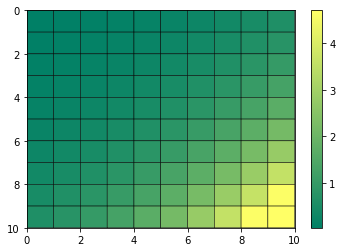

In [27]:
plt.pcolor(state_value_matrix,cmap='summer',edgecolors='k',linewidths=0.5)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

# Q4 Explain the distribution of the optimal state values across the 2-D grid.

# Q5 compute the optimal policy

In [28]:
# value iteration
r=0.8
State_Value={} #state value function, input is state, output is value
New_State_Value={}
for i in range(100):
    State_Value[i]=0
delta=math.inf
seita=0.01
while delta>seita:
    delta=0
    for current_s in range(100):
        v=State_Value[current_s]
        temp_max={}
        for a in A:
            temp_max[a]=0
            for next_s in range(100):
                temp_max[a]+=transition_P(current_s,next_s,a)*(R(next_s,Rewardfunction1)+r*State_Value[next_s])
              
        State_Value[current_s]=max(temp_max['U'],temp_max['D'],temp_max['R'],temp_max['L']).copy()
        
        delta=max(delta,abs(v-State_Value[current_s]))
    #State_Value=New_State_Value.copy()


        
opt_action1={}
for current_s in range(100):
    for a in A:
        temp_max[a]=0
        for next_s in range(100):
            temp_max[a]+=transition_P(current_s,next_s,a)*(R(next_s,Rewardfunction1)+r*State_Value[next_s])
                
    search=max(temp_max['U'],temp_max['D'],temp_max['R'],temp_max['L'])  
    for act, sum_vaule in temp_max.items():
        if sum_vaule==search:
            opt_action1[current_s]=act

In [29]:
# create optional action matrix
opt_action_matrix=np.zeros((10,10),dtype=np.unicode_)
for index in range(100):
    temp=np.where(S==index)
    if opt_action1[index]=='U':
        arrow=u'\u2191'
    elif opt_action1[index]=='D':   
        arrow=u'\u2193'
    elif opt_action1[index]=='R':   
        arrow=u'\u2192'
    elif opt_action1[index]=='L':
        arrow=u'\u2190'
    else:
        arrow=0
    
    opt_action_matrix[int(temp[0]),int(temp[1])]=arrow    

In [30]:
display(DataFrame(opt_action_matrix))

,0,1,2,3,4,5,6,7,8,9
0,↓,→,→,→,→,→,→,↓,↓,↓
1,↓,→,→,→,→,→,↓,↓,↓,↓
2,↓,↓,↓,→,→,↓,↓,↓,↓,↓
3,↓,↓,↓,↓,↓,↓,↓,↓,↓,↓
4,↓,↓,↓,→,↓,↓,↓,↓,↓,↓
5,↓,↓,→,→,→,↓,↓,↓,↓,↓
6,↓,→,→,→,→,→,↓,↓,↓,↓
7,→,→,→,→,→,→,→,↓,↓,↓
8,→,→,→,→,→,→,→,→,↓,↓
9,→,→,→,→,→,→,→,→,→,↓


# Q6  Modify the environment of the agent by replacing Reward function 1 with Reward function 2

In [80]:
r=0.8
State_Value={} #state value function, input is state, output is value
New_State_Value={}
for i in range(100):
    State_Value[i]=0
delta=math.inf
seita=0.01
while delta>seita:
    delta=0
    for current_s in range(100):
        v=State_Value[current_s]
        temp_max={}
        for a in A:
            temp_max[a]=0
            for next_s in range(100):
                temp_max[a]+=transition_P(current_s,next_s,a)*(R(next_s,Rewardfunction2)+r*State_Value[next_s])
              
        New_State_Value[current_s]=max(temp_max['U'],temp_max['D'],temp_max['R'],temp_max['L'])
        
        delta=max(delta,abs(v-New_State_Value[current_s]))
    State_Value=New_State_Value.copy()
    
# create state_value_matrix
state_value_matrix=np.zeros((10,10))
for index in range(100):
    temp=np.where(S==index)
    state_value_matrix[int(temp[0]),int(temp[1])]=State_Value[index]

In [81]:
display(DataFrame(state_value_matrix))

,0,1,2,3,4,5,6,7,8,9
0,0.646710,0.790798,0.820813,0.525100,-2.386476,-4.236930,-1.923374,1.128097,1.591162,2.034827
1,0.827724,1.017733,1.061580,-1.879217,-6.754669,-8.683714,-6.373483,-1.298361,1.924775,2.606893
2,1.061312,1.313001,1.445788,-1.635211,-6.757757,-13.916635,-9.653202,-5.514815,-0.134600,3.355478
3,1.357786,1.689182,1.943907,-1.243217,-6.339216,-7.982771,-7.947292,-9.434452,-1.918155,4.387045
4,1.733934,2.168079,2.585895,-0.736490,-5.846727,-3.258403,-3.241071,-7.434498,1.715158,9.159524
5,2.211119,2.777553,3.413345,-0.038140,-5.114112,-0.553380,-0.487536,-2.983515,6.582692,15.353757
6,2.816429,3.552963,4.478824,3.024358,2.480209,2.880151,-0.465523,-4.910549,12.688464,23.296389
7,3.584202,4.539186,5.792569,7.288420,6.718773,7.241102,0.930890,12.366437,21.159165,33.482577
8,4.557967,5.794705,7.397203,9.439455,12.008201,12.889183,17.097345,23.013970,33.778251,46.528791
9,5.726633,7.316079,9.387596,12.044687,15.452355,19.823974,25.497506,36.157594,46.583383,47.311471


# Q7

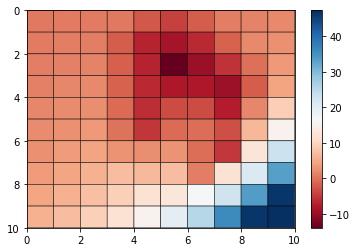

In [82]:
plt.pcolor(state_value_matrix,cmap='RdBu',edgecolors='k',linewidths=0.5)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

# Q8 

In [83]:
#explain the distibution of optimal state values

# Q9

In [84]:
opt_action2={}
for current_s in range(100):
    for a in A:
        temp_max[a]=0
        for next_s in range(100):
            temp_max[a]+=transition_P(current_s,next_s,a)*(R(next_s,Rewardfunction2)+r*State_Value[next_s])
                
    search=max(temp_max['U'],temp_max['D'],temp_max['R'],temp_max['L'])  
    for act, sum_vaule in temp_max.items():
        if sum_vaule==search:
            opt_action2[current_s]=act
            
# create optional action matrix
opt_action_matrix=np.zeros((10,10),dtype=np.unicode_)
for index in range(100):
    temp=np.where(S==index)
    if opt_action2[index]=='U':
        arrow=u'\u2191'
    elif opt_action2[index]=='D':   
        arrow=u'\u2193'
    elif opt_action2[index]=='R':   
        arrow=u'\u2192'
    elif opt_action2[index]=='L':
        arrow=u'\u2190'
    else:
        arrow=0
    
    opt_action_matrix[int(temp[0]),int(temp[1])]=arrow    
display(DataFrame(opt_action_matrix))

,0,1,2,3,4,5,6,7,8,9
0,↓,↓,↓,←,←,→,→,→,→,↓
1,↓,↓,↓,←,←,↑,→,→,→,↓
2,↓,↓,↓,←,←,↓,→,→,→,↓
3,↓,↓,↓,←,←,↓,↓,↑,→,↓
4,↓,↓,↓,←,←,↓,↓,↓,→,↓
5,↓,↓,↓,←,←,↓,↓,←,→,↓
6,↓,↓,↓,↓,↓,↓,←,←,→,↓
7,↓,↓,↓,↓,↓,↓,←,↓,↓,↓
8,→,→,→,↓,↓,↓,↓,↓,↓,↓
9,→,→,→,→,→,→,→,→,→,↓


## IRL reward 1

In [31]:
#set up D
D=np.zeros((1000,300))
P_a1=np.zeros((100,100))
P_a2=np.zeros((100,100))
P_a3=np.zeros((100,100))
P_a4=np.zeros((100,100))

D[600:700,100:200]=-np.identity(100)
D[700:800,100:200]=-np.identity(100)
D[600:700,200:300]=np.identity(100)
D[700:800,200:300]=-np.identity(100)
D[800:900,200:300]=np.identity(100)
D[900:1000,200:300]=-np.identity(100)

#D[0:100,0:100]=np.identity(100)
#D[100:200,0:100]=np.identity(100)
#D[200:300,0:100]=np.identity(100)
for i in range(100):
    D[i*3:i*3+3,i]=1
    

for i in range(100):
    A1=A.copy()
    A1.remove(opt_action1[i])
    for j in range(100):
        P_a1[i,j]=transition_P(i,j,opt_action1[i])
        P_a2[i,j]=transition_P(i,j,A1[0])
        P_a3[i,j]=transition_P(i,j,A1[1])
        P_a4[i,j]=transition_P(i,j,A1[2])
    #set up inverse part
    for s1 in range(100):
        for s2 in range(100):
            P_a=transition_P(s1,s2,opt_action1[i])
    ainv1=np.identity(100)-r*P_a
    ainv=inv(ainv1)

#for i in range(100):
#    temp_a2=P_a1[i,:]-P_a2[i,:]
#    temp_a3=P_a1[i,:]-P_a3[i,:]
#    temp_a4=P_a1[i,:]-P_a4[i,:]
#    D[i*3,200:300]=-np.matmul(temp_a2,ainv)
#    D[i*3+1,200:300]=-np.matmul(temp_a3,ainv)
#    D[i*3+2,200:300]=-np.matmul(temp_a4,ainv)

    D[i*3,200:300]=-np.dot(P_a1[i,:]-P_a2[i,:],ainv)
    D[i*3+1,200:300]=-np.dot(P_a1[i,:]-P_a3[i,:],ainv)
    D[i*3+2,200:300]=-np.dot(P_a1[i,:]-P_a4[i,:],ainv)


D[300:600,200:300]=D[0:300,200:300]

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6270e+02  2e+03  2e+00  7e+00  1e+00
 1: -9.9007e+00 -9.6824e+01  4e+02  7e-01  2e+00  1e+00
 2: -1.3862e+01 -5.5362e+01  2e+02  4e-01  1e+00  8e-01
 3: -1.6173e+01 -2.5015e+01  3e+01  8e-02  2e-01  2e-01
 4: -1.8113e+01 -2.1777e+01  1e+01  3e-02  1e-01  7e-02
 5: -2.0431e+01 -2.1598e+01  4e+00  1e-02  3e-02  2e-02
 6: -2.1524e+01 -2.1602e+01  3e-01  7e-04  2e-03  1e-03
 7: -2.1599e+01 -2.1600e+01  3e-03  7e-06  2e-05  1e-05
 8: -2.1600e+01 -2.1600e+01  3e-05  7e-08  2e-07  1e-07
 9: -2.1600e+01 -2.1600e+01  3e-07  7e-10  2e-09  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6270e+02  2e+03  2e+00  7e+00  1e+00
 1: -5.5022e+00 -7.9043e+01  3e+02  6e-01  2e+00  1e+00
 2: -7.8106e+00 -4.1101e+01  1e+02  3e-01  9e-01  6e-01
 3: -9.8222e+00 -1.7274e+01  2e+01  6e-02  2e-01  1e-01
 4: -1.1255e+01 -1.4649e+01  9e+00  3e-02  9e-02  5e-02
 5: -1.2997e+01 -1.3654e+01 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6270e+02  2e+03  2e+00  4e+00  1e+00
 1:  3.0731e+00 -8.2487e+01  3e+02  7e-01  1e+00  1e+00
 2:  2.3435e+00 -1.1365e+01  4e+01  1e-01  2e-01  3e-01
 3:  1.4556e+00 -6.0374e+00  2e+01  6e-02  1e-01  1e-01
 4:  2.1812e-01 -1.0905e+00  3e+00  1e-02  2e-02  7e-03
 5: -3.6182e-01 -3.8330e-01  5e-02  2e-04  3e-04  1e-04
 6: -3.7133e-01 -3.7155e-01  5e-04  2e-06  3e-06  1e-06
 7: -3.7143e-01 -3.7143e-01  5e-06  2e-08  3e-08  1e-08
 8: -3.7143e-01 -3.7143e-01  5e-08  2e-10  3e-10  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6270e+02  2e+03  2e+00  4e+00  1e+00
 1:  3.3166e+00 -8.2425e+01  3e+02  7e-01  1e+00  1e+00
 2:  2.3729e+00 -1.1322e+01  4e+01  1e-01  2e-01  3e-01
 3:  1.0363e+00 -3.9043e+00  1e+01  4e-02  7e-02  9e-02
 4:  2.8001e-01 -9.8464e-01  3e+00  1e-02  2e-02  4e-03
 5: -2.2486e-01 -3.1306e-01  2e-01  8e-04  1e-03  3e-04
 6: -2.6894e-01 -2.6983e-01 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6270e+02  2e+03  2e+00  2e+00  1e+00
 1:  8.0315e+00 -5.9280e+01  3e+02  6e-01  6e-01  8e-01
 2:  2.1625e+00 -5.6575e+00  3e+01  7e-02  7e-02  1e-01
 3:  3.0712e-02 -7.0202e-02  3e-01  9e-04  8e-04  2e-03
 4:  3.0724e-04 -7.0280e-04  3e-03  9e-06  8e-06  2e-05
 5:  3.0724e-06 -7.0280e-06  3e-05  9e-08  8e-08  2e-07
 6:  3.0724e-08 -7.0280e-08  3e-07  9e-10  8e-10  2e-09
 7:  3.0724e-10 -7.0280e-10  3e-09  9e-12  8e-12  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6270e+02  2e+03  2e+00  2e+00  1e+00
 1:  8.3099e+00 -5.7219e+01  3e+02  6e-01  5e-01  8e-01
 2:  2.1322e+00 -5.5169e+00  3e+01  7e-02  6e-02  1e-01
 3:  2.8824e-02 -6.5224e-02  3e-01  8e-04  8e-04  1e-03
 4:  2.8824e-04 -6.5251e-04  3e-03  8e-06  8e-06  1e-05
 5:  2.8823e-06 -6.5250e-06  3e-05  8e-08  8e-08  1e-07
 6:  2.8823e-08 -6.5250e-08  3e-07  8e-10  8e-10  1e-09
 7:  2.8823e-10 -6.5250e-10 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6270e+02  2e+03  2e+00  1e+00  1e+00
 1:  1.0181e+01 -2.4737e+01  2e+02  3e-01  2e-01  5e-01
 2:  8.9870e-01 -1.2413e+00  8e+00  2e-02  1e-02  4e-02
 3:  9.1028e-03 -1.2347e-02  8e-02  2e-04  1e-04  4e-04
 4:  9.1014e-05 -1.2345e-04  8e-04  2e-06  1e-06  4e-06
 5:  9.1014e-07 -1.2345e-06  8e-06  2e-08  1e-08  4e-08
 6:  9.1014e-09 -1.2345e-08  8e-08  2e-10  1e-10  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6270e+02  2e+03  2e+00  1e+00  1e+00
 1:  1.0155e+01 -2.2583e+01  2e+02  3e-01  2e-01  5e-01
 2:  7.7605e-01 -9.7835e-01  7e+00  2e-02  1e-02  3e-02
 3:  7.7989e-03 -9.7176e-03  7e-02  2e-04  1e-04  3e-04
 4:  7.7979e-05 -9.7162e-05  7e-04  2e-06  1e-06  3e-06
 5:  7.7979e-07 -9.7162e-07  7e-06  2e-08  1e-08  3e-08
 6:  7.7979e-09 -9.7162e-09  7e-08  2e-10  1e-10  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0

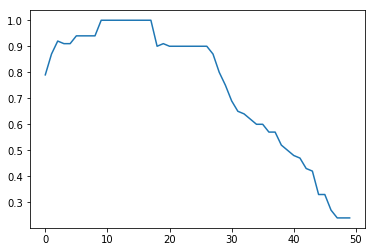

In [32]:
accuracy=np.zeros((500,1))
c=np.zeros((300,1))
b=np.zeros((1000,1))
index=0
for lam in np.linspace(0,5,50): 

    #set up c
    c[0:100]=-1
    c[100:200]=lam
    c=matrix(c)

    #set up b
    b[800:1000]=1
    b=matrix(b)
    D=matrix(D)

    #solve for reward function
    Rew=solvers.lp(c,D,b)
    rew=matrix(Rew['x'][200:300])

    rf=np.zeros((10,10))
    for i in range(100):
        p=i%10
        q=int((i-i%10)/10)
        rf[p,q]=rew[i,0]

    State_Value1={} #state value function, input is state, output is value
    New_State_Value1={}
    for i in range(100):
        State_Value1[i]=0
    delta=math.inf
    seita=0.01
    while delta>seita:
        delta=0
        for current_s in range(100):
            v=State_Value1[current_s]
            temp_max1={}
            for a in A:
                temp_max1[a]=0
                for next_s in range(100):
                    temp_max1[a]+=transition_P(current_s,next_s,a)*(R(next_s,rf)+r*State_Value1[next_s])

            State_Value1[current_s]=max(temp_max1['U'],temp_max1['D'],temp_max1['R'],temp_max1['L'])

            delta=max(delta,abs(v-State_Value1[current_s]))
        #State_Value1=New_State_Value1.copy()

    temp_max1={}
    opt_act1={}
    for current_s in range(100):
        for a in A:
            temp_max1[a]=0
            for next_s in range(100):
                temp_max1[a]+=transition_P(current_s,next_s,a)*(R(next_s,rf)+r*State_Value1[next_s])

        search=max(temp_max1['U'],temp_max1['D'],temp_max1['R'],temp_max1['L'])  
        for act, sum_vaule in temp_max1.items():
            if sum_vaule==search:
                opt_act1[current_s]=act

    for i in range(100):
        if opt_act1[i]==opt_action1[i]:
            accuracy[index,0]=accuracy[index,0]+1
    index=index+1        
accuracy=accuracy/100
plt.plot(accuracy[0:index])

In [33]:
l=np.linspace(0,5,50)
c[100:200]=l[np.argmax(accuracy)]

mRew=solvers.lp(c,D,b)
mrew=np.matrix(Rew['x'][200:300])

mrf=np.zeros((10,10))
for i in range(100):
    p=i%10
    q=int((i-i%10)/10)
    mrf[p,q]=mrew[i,0]



State_Value1={} #state value function, input is state, output is value
New_State_Value1={}
for i in range(100):
    State_Value1[i]=0
delta=math.inf
seita=0.01
while delta>seita:
    delta=0
    for current_s in range(100):
        v=State_Value1[current_s]
        temp_max1={}
        for a in A:
            temp_max1[a]=0
            for next_s in range(100):
                temp_max1[a]+=transition_P(current_s,next_s,a)*(R(next_s,mrf)+r*State_Value1[next_s])
              
        State_Value1[current_s]=max(temp_max1['U'],temp_max1['D'],temp_max1['R'],temp_max1['L'])
        
        delta=max(delta,abs(v-State_Value1[current_s]))
    #State_Value1=New_State_Value1.copy()
    
# create state_value_matrix
state_value_matrix=np.zeros((10,10))
for index in range(100):
    temp=np.where(S==index)
    state_value_matrix[int(temp[0]),int(temp[1])]=State_Value1[index]     

display(DataFrame(state_value_matrix))

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6270e+02  2e+03  2e+00  5e+00  1e+00
 1:  2.5582e+00 -7.5127e+01  3e+02  7e-01  1e+00  1e+00
 2:  2.1022e+00 -1.5680e+01  5e+01  2e-01  3e-01  3e-01
 3:  2.2240e-01 -3.3609e+00  8e+00  3e-02  7e-02  4e-02
 4: -8.0518e-01 -1.0114e+00  4e-01  2e-03  4e-03  2e-03
 5: -8.7811e-01 -8.8459e-01  1e-02  6e-05  1e-04  3e-05
 6: -8.8160e-01 -8.8166e-01  1e-04  6e-07  1e-06  3e-07
 7: -8.8163e-01 -8.8163e-01  1e-06  6e-09  1e-08  3e-09
 8: -8.8163e-01 -8.8163e-01  1e-08  6e-11  1e-10  3e-11
Optimal solution found.


,0,1,2,3,4,5,6,7,8,9
0,6.569622e-12,7.040971e-12,6.181076e-12,9.981027e-12,1.102345e-11,9.905566e-12,8.847299e-12,8.901823e-12,1.054173e-11,4.894136e-12
1,7.195206e-12,1.201263e-11,1.005026e-11,1.312847e-11,1.327988e-11,1.279746e-11,1.085736e-11,1.093752e-11,1.054178e-11,1.053009e-11
2,1.192564e-11,1.415106e-11,1.307920e-11,1.301197e-11,1.254179e-11,1.108820e-11,1.018560e-11,1.053974e-11,1.062679e-11,1.120907e-11
3,1.405997e-11,1.370741e-11,1.335068e-11,1.336300e-11,1.104597e-11,9.949658e-12,8.352314e-12,9.084879e-12,8.932163e-12,9.636670e-12
4,1.344976e-11,1.365707e-11,1.366850e-11,1.184256e-11,1.015265e-11,1.453636e-11,1.076018e-11,6.483403e-12,6.917759e-12,7.215781e-12
5,1.140909e-11,1.176842e-11,1.186041e-11,1.032882e-11,1.454239e-11,1.679223e-11,1.505200e-11,8.661491e-12,4.011671e-12,4.723008e-12
6,9.452673e-12,1.000110e-11,9.376495e-12,7.799855e-12,1.663474e-11,1.516489e-11,1.370467e-11,1.115846e-11,4.414164e-12,1.509923e-12
7,9.182898e-12,1.098277e-11,1.049906e-11,8.252545e-12,1.002049e-11,1.360320e-11,1.124143e-11,9.128378e-12,6.260338e-12,-1.369650e-12
8,1.062650e-11,1.051737e-11,1.037937e-11,8.635467e-12,5.900409e-12,6.488889e-12,9.047165e-12,6.303364e-12,3.426999e-12,5.670424e-11
9,4.866060e-12,1.031587e-11,1.094601e-11,9.169908e-12,6.571053e-12,3.400406e-12,1.419548e-12,3.388526e-12,5.695427e-11,6.062257e-11


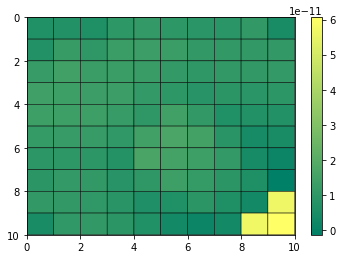

In [34]:
plt.pcolor(state_value_matrix,cmap='summer',edgecolors='k',linewidths=0.5)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

In [35]:
opt_act={}
for current_s in range(100):
    for a in A:
        temp_max1[a]=0
        for next_s in range(100):
            temp_max1[a]+=transition_P(current_s,next_s,a)*(R(next_s,mrf)+r*State_Value1[next_s])

    search=max(temp_max1['U'],temp_max1['D'],temp_max1['R'],temp_max1['L'])  
    for act, sum_vaule in temp_max1.items():
        if sum_vaule==search:
            opt_act[current_s]=act
                
# create optional action matrix
opt_action_matrix=np.zeros((10,10),dtype=np.unicode_)

for index in range(100):
    temp=np.where(S==index)
    if opt_act[index]=='U':
        arrow=u'\u2191'
    elif opt_act[index]=='D':   
        arrow=u'\u2193'
    elif opt_act[index]=='R':   
        arrow=u'\u2192'
    elif opt_act[index]=='L':
        arrow=u'\u2190'
    else:
        arrow=0
    
    opt_action_matrix[int(temp[0]),int(temp[1])]=arrow    
display(DataFrame(opt_action_matrix))

,0,1,2,3,4,5,6,7,8,9
0,↓,→,↓,↓,↓,↓,→,↑,←,↓
1,↓,→,→,←,←,←,←,↑,→,→
2,←,←,↓,↑,↑,←,←,↑,↑,↑
3,↑,←,←,←,↓,↓,↑,↑,↑,↑
4,↑,↑,↑,→,↓,↓,←,↑,↑,↑
5,↑,↑,↑,→,→,←,←,←,↑,↑
6,↓,↓,↑,→,↑,↑,←,←,←,↑
7,←,←,←,←,↑,↑,↑,←,←,↓
8,↑,↓,←,←,←,↑,↑,↑,↓,↓
9,→,↓,←,←,←,←,↑,→,→,↓


## reward function2

In [57]:
#set up D
D=np.zeros((1000,300))
P_a1=np.zeros((100,100))
P_a2=np.zeros((100,100))
P_a3=np.zeros((100,100))
P_a4=np.zeros((100,100))

D[600:700,100:200]=-np.identity(100)
D[700:800,100:200]=-np.identity(100)
D[600:700,200:300]=np.identity(100)
D[700:800,200:300]=-np.identity(100)
D[800:900,200:300]=np.identity(100)
D[900:1000,200:300]=-np.identity(100)

D[0:100,0:100]=np.identity(100)
D[100:200,0:100]=np.identity(100)
D[200:300,0:100]=np.identity(100)
#for i in range(100):
#    D[i*3:i*3+3,i]=1
    
for i in range(100):
    for j in range(100):
        P_a1[i,j]=transition_P(i,j,opt_action2[i])
        
#set up inverse part
ainv2=np.identity(100)-r*P_a1
ainv=inv(ainv2)


for i in range(100):
    A2=A.copy()
    A2.remove(opt_action2[i])
    for j in range(100):
        P_a2[i,j]=transition_P(i,j,A2[0])
        P_a3[i,j]=transition_P(i,j,A2[1])
        P_a4[i,j]=transition_P(i,j,A2[2])

#for i in range(100):
#    temp_a2=P_a1[i,:]-P_a2[i,:]
#    temp_a3=P_a1[i,:]-P_a3[i,:]
#    temp_a4=P_a1[i,:]-P_a4[i,:]
#    D[i*3,200:300]=-np.matmul(temp_a2,ainv)
#    D[i*3+1,200:300]=-np.matmul(temp_a3,ainv)
#    D[i*3+2,200:300]=-np.matmul(temp_a4,ainv)

D[0:100,200:300]=-np.matmul(P_a1-P_a2,ainv)
D[100:200,200:300]=-np.matmul(P_a1-P_a3,ainv)
D[200:300,200:300]=-np.matmul(P_a1-P_a4,ainv)


D[300:600,200:300]=D[0:300,200:300]

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+04  3e+04  2e-02  3e+01  1e+00
 1:  9.9848e+00 -2.6510e+04  3e+04  2e-02  2e+01  2e+00
 2: -1.7223e+01 -1.2185e+04  1e+04  9e-03  1e+01  3e+00
 3: -2.0571e+02 -6.8487e+03  8e+03  5e-03  6e+00  3e+00
 4: -9.9295e+02 -5.6524e+03  7e+03  3e-03  4e+00  3e+00
 5: -2.5956e+03 -7.7746e+03  1e+04  4e-03  4e+00  6e+00
 6: -2.5336e+03 -7.6841e+03  1e+04  4e-03  4e+00  7e+00
 7: -3.8578e+03 -6.9351e+03  9e+03  2e-03  3e+00  5e+00
 8: -4.9443e+03 -6.6097e+03  6e+03  1e-03  1e+00  3e+00
 9: -5.3547e+03 -6.4104e+03  4e+03  8e-04  9e-01  2e+00
10: -5.8329e+03 -6.3068e+03  2e+03  4e-04  4e-01  2e+00
11: -6.0565e+03 -6.2997e+03  1e+03  2e-04  2e-01  8e-01
12: -6.2236e+03 -6.3035e+03  3e+02  6e-05  7e-02  3e-01
13: -6.2925e+03 -6.3180e+03  1e+02  2e-05  2e-02  1e-01
14: -6.3084e+03 -6.3215e+03  6e+01  1e-05  1e-02  6e-02
15: -6.3177e+03 -6.3235e+03  3e+01  4e-06  5e-03  3e-02
16: -6.3212e+03 -6.3240e+03  1e+01  2e-06  2e-03  

 9:  3.6463e-07 -4.9295e-07  9e-07  6e-13  2e-10  5e-10
10:  3.6463e-09 -4.9295e-09  9e-09  6e-15  2e-12  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.2814e+02 -2.4134e+04  3e+04  2e-02  4e+00  2e+00
 2:  3.7763e+02 -1.2598e+04  1e+04  1e-02  2e+00  2e+00
 3:  2.9452e+02 -3.4787e+03  4e+03  3e-03  7e-01  1e+00
 4:  1.3092e+02 -4.0480e+02  6e+02  4e-04  1e-01  3e-01
 5:  8.7821e+00 -1.4583e+01  2e+01  2e-05  4e-03  1e-02
 6:  8.8750e-02 -1.4619e-01  2e-01  2e-07  4e-05  1e-04
 7:  8.8746e-04 -1.4619e-03  2e-03  2e-09  4e-07  1e-06
 8:  8.8746e-06 -1.4619e-05  2e-05  2e-11  4e-09  1e-08
 9:  8.8746e-08 -1.4619e-07  2e-07  2e-13  4e-11  1e-10
10:  8.8746e-10 -1.4619e-09  2e-09  2e-15  4e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.3206e+02 -2.4035e+04  3e+04  2e-02  4e+00  2e+00
 2: 

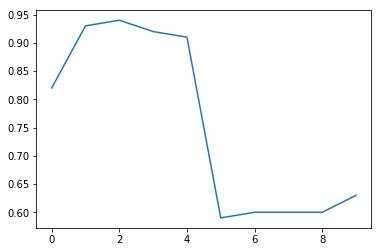

In [58]:
accuracy2=np.zeros((10,1))
c=np.zeros((300,1))
b=np.zeros((1000,1))
Rmax=[1,100]
index=0
for lam in np.linspace(0,5,10): 
    #set up c
    c[0:100]=-1
    c[100:200]=lam
    c=matrix(c)

    #set up b
    b[800:900]=100
    b[900:1000]=100
    b=matrix(b)
    D=matrix(D)

    #solve for reward function
    Rew=solvers.lp(c,D,b)
    rew=np.matrix(Rew['x'][200:300])

    rf=np.zeros((10,10))
    for i in range(100):
        p=i%10
        q=int((i-i%10)/10)
        rf[p,q]=rew[i,0]

    State_Value2={} #state value function, input is state, output is value
    New_State_Value2={}
    for i in range(100):
        State_Value2[i]=0
    delta=math.inf
    seita=0.01
    while delta>seita:
        delta=0
        for current_s in range(100):
            v=State_Value2[current_s]
            temp_max2={}
            for a in A:
                temp_max2[a]=0
                for next_s in range(100):
                    temp_max2[a]+=transition_P(current_s,next_s,a)*(R(next_s,rf)+r*State_Value2[next_s])

            New_State_Value2[current_s]=max(temp_max2['U'],temp_max2['D'],temp_max2['R'],temp_max2['L'])

            delta=max(delta,abs(v-New_State_Value2[current_s]))
        State_Value2=New_State_Value2.copy()


    opt_act2={}
    temp_max2={}
    for current_s in range(100):
        for a in A:
            temp_max2[a]=0
            for next_s in range(100):
                temp_max2[a]+=transition_P(current_s,next_s,a)*(R(next_s,rf)+r*State_Value2[next_s])

        search=max(temp_max2['U'],temp_max2['D'],temp_max2['R'],temp_max2['L'])  
        for act, sum_vaule in temp_max2.items():
            if sum_vaule==search:
                opt_act2[current_s]=act

    for i in range(100):
        if opt_act2[i]==opt_action2[i]:
            accuracy2[index,0]=accuracy2[index,0]+1
            
    index=index+1  
    
accuracy2=accuracy2/100
plt.plot(accuracy2[0:index])

In [59]:
l=np.linspace(0,5,10)
c[100:200]=l[np.argmax(accuracy2)]

mRew=solvers.lp(c,D,b)
mrew=np.matrix(mRew['x'][200:300])

mrf=np.zeros((10,10))
for i in range(100):
    p=i%10
    q=int((i-i%10)/10)
    mrf[p,q]=mrew[i,0]

State_Value2={} #state value function, input is state, output is value
New_State_Value2={}
for i in range(100):
    State_Value2[i]=0
delta=math.inf
seita=0.01
while delta>seita:
    delta=0
    for current_s in range(100):
        v=State_Value2[current_s]
        temp_max2={}
        for a in A:
            temp_max2[a]=0
            for next_s in range(100):
                temp_max2[a]+=transition_P(current_s,next_s,a)*(R(next_s,mrf)+r*State_Value2[next_s])
              
        New_State_Value2[current_s]=max(temp_max2['U'],temp_max2['D'],temp_max2['R'],temp_max2['L'])
        
        delta=max(delta,abs(v-New_State_Value2[current_s]))
    State_Value2=New_State_Value2.copy() 
    
# create state_value_matrix
state_value_matrix2=np.zeros((10,10))
for index in range(100):
    temp=np.where(S==index)
    state_value_matrix2[int(temp[0]),int(temp[1])]=State_Value2[index]

display(DataFrame(state_value_matrix))

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -3.0305e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.6533e+01 -2.5129e+04  3e+04  2e-02  1e+01  2e+00
 2:  2.3214e+02 -1.1053e+04  1e+04  8e-03  6e+00  3e+00
 3:  1.6077e+02 -4.5458e+03  5e+03  3e-03  3e+00  2e+00
 4:  1.0486e+02 -3.4303e+03  5e+03  3e-03  2e+00  2e+00
 5: -3.7390e+02 -2.6426e+03  4e+03  2e-03  1e+00  3e+00
 6: -4.9519e+02 -2.6803e+03  4e+03  2e-03  1e+00  3e+00
 7: -4.8272e+02 -2.5575e+03  4e+03  2e-03  1e+00  3e+00
 8: -5.9159e+02 -2.3604e+03  4e+03  1e-03  1e+00  3e+00
 9: -7.4737e+02 -1.9885e+03  3e+03  9e-04  7e-01  2e+00
10: -1.0878e+03 -1.7044e+03  1e+03  5e-04  3e-01  1e+00
11: -1.3061e+03 -1.5316e+03  5e+02  2e-04  1e-01  5e-01
12: -1.3736e+03 -1.4969e+03  3e+02  9e-05  7e-02  3e-01
13: -1.4396e+03 -1.4703e+03  7e+01  2e-05  2e-02  7e-02
14: -1.4468e+03 -1.4663e+03  5e+01  1e-05  1e-02  4e-02
15: -1.4583e+03 -1.4631e+03  1e+01  4e-06  3e-03  1e-02
16: -1.4598e+03 -1.4626e+03  7e+00  2e-06  2e-03  

,0,1,2,3,4,5,6,7,8,9
0,0.065815,0.091877,0.125900,0.169112,0.224021,0.293680,0.382052,0.494130,0.615896,0.634208
1,0.091727,0.122604,0.165536,0.220452,0.290431,0.379644,0.493297,0.636309,0.794042,0.815002
2,0.125702,0.165521,0.220290,0.290306,0.379576,0.493350,0.638277,0.821170,1.026051,1.050169
3,0.168844,0.220437,0.290306,0.379574,0.493351,0.638362,0.823118,1.056953,1.323961,1.350450
4,0.223671,0.290417,0.379577,0.493351,0.638364,0.823180,1.058695,1.357535,1.705784,1.733711
5,0.293221,0.379635,0.493351,0.638363,0.823181,1.058730,1.358927,1.740669,2.195227,2.222838
6,0.381455,0.493282,0.638300,0.823138,1.058710,1.358935,1.741559,2.228950,2.822742,2.847015
7,0.493351,0.636632,0.821550,1.057386,1.357967,1.741051,2.229204,2.851134,3.627441,3.643447
8,0.618021,0.796952,1.030024,1.329227,1.712766,2.204491,2.835046,3.627694,3.679710,4.659564
9,0.634545,0.815466,1.050695,1.351026,1.734318,2.223438,2.847542,3.643797,4.659571,4.705811


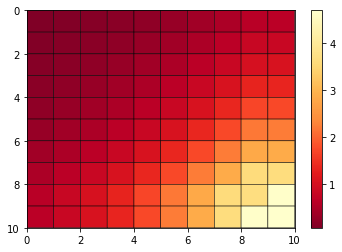

In [60]:
plt.pcolor(state_value_matrix,cmap='YlOrRd_r',edgecolors='k',linewidths=0.5)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

In [61]:
##### create optional action matrix
opt_act_matrix=np.zeros((10,10),dtype=np.unicode_)
for index in range(100):
    temp=np.where(S==index)
    if opt_act2[index]=='U':
        arrow=u'\u2191'
    elif opt_act2[index]=='D':   
        arrow=u'\u2193'
    elif opt_act2[index]=='R':   
        arrow=u'\u2192'
    elif opt_act2[index]=='L':
        arrow=u'\u2190'
    else:
        arrow=0
    
    opt_act_matrix[int(temp[0]),int(temp[1])]=arrow    
display(DataFrame(opt_act_matrix))

,0,1,2,3,4,5,6,7,8,9
0,↓,→,→,↑,←,↑,→,→,→,↓
1,↓,→,↑,↑,↑,↑,↑,→,→,↓
2,↓,↓,↓,←,←,↑,→,→,→,→
3,↓,↓,↓,←,←,←,→,↑,→,↑
4,↓,→,↓,←,←,←,↓,↑,→,↑
5,→,→,↑,←,←,↓,↓,←,→,↑
6,↓,↑,↓,←,→,→,←,←,←,↑
7,←,↓,↓,↓,↓,↓,↑,←,↓,↓
8,→,→,←,↓,↓,↓,↓,↓,↓,↓
9,↑,↑,→,↓,→,↓,←,→,→,↓
